In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_15 = pd.read_csv('2015-building-energy-benchmarking.csv')
df_16 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [4]:
# Alterar tipos dos dados

df_15.dtypes

df_15['DataYear'] = df_15['DataYear'].astype(int)

In [5]:
# Acima de 30% de dados faltantes já são preocupantes (preencher com média, mediana,...),
# 60% talvez seja necessario excluir a colunas

percen_faltantes_15 = round((df_15.isnull().sum() / len(df_15['DataYear']) )*100, 2)

# Preenchendo dados faltantes pela mediana, performa melhor caso tenha outliers
df_15['ENERGYSTARScore'].fillna(df_15['ENERGYSTARScore'].median(), inplace= True ) 

<h1>Coeficiente de Pearson - Feature Selection<h1>

Para evitar selecionar duas ou mais varáveis preditoras que se correlacionam entre si utilizamos o coeficiente de pearson para localiza-las e remover-las do modelo, para isso recorremos ao calculo do coeficiente de Perason que informa com base na escala de -1 a 1 o nível de correlação entre 2 váriaveis.

<ul>
<li><strong>0.9</strong> para mais ou para menos indica uma correlação muito forte.</li>
<li><strong>0.7 a 0.9</strong> positivo ou negativo indica uma correlação forte.</li>
<li><strong>0.5 a 0.7</strong> positivo ou negativo indica uma correlação moderada.</li>
<li><strong>0.3 a 0.5</strong> positivo ou negativo indica uma correlação fraca.</li>
<li><strong>0 a 0.3</strong> positivo ou negativo indica uma correlação desprezível.</li>
</ul>

O valor de Pearson só pode ser calculado a partir de valores númericos, com base na visão de mapa de calor é possível apontar correlações de maneira mais fácil levando em conta uma grande quantidade de váriaveis preditoras.

In [6]:
##df_15.corr(method = 'pearson', numeric_only=True)

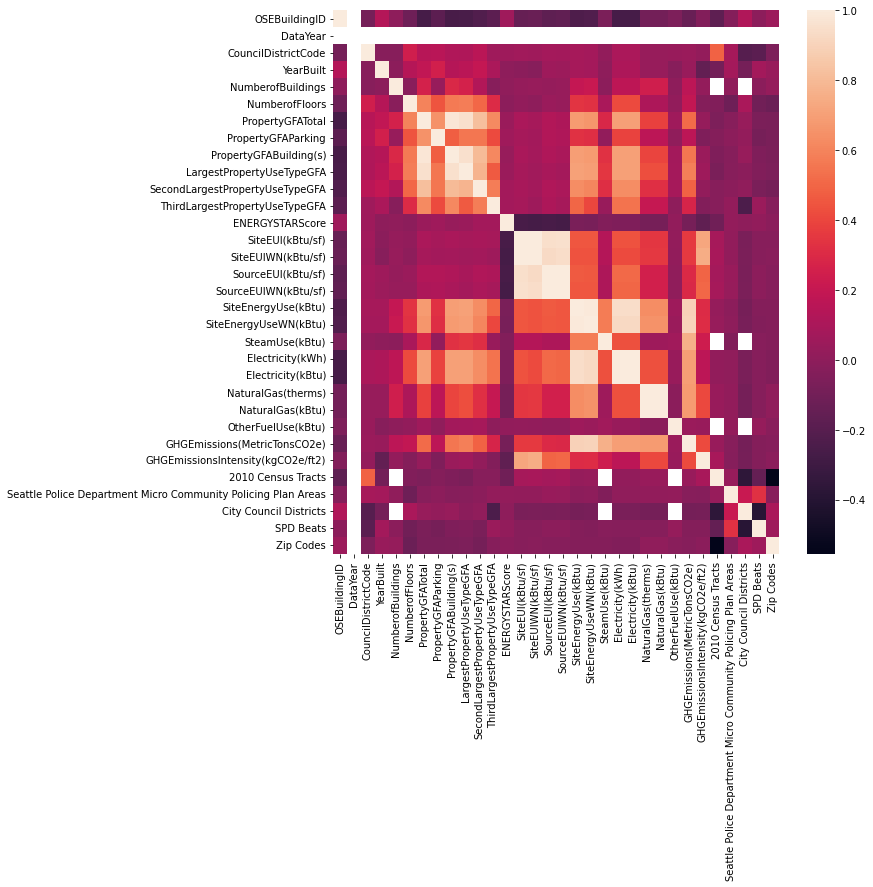

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df_15.corr(method = 'pearson', numeric_only=True))
plt.show()

c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\dython\nominal.py:883: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast

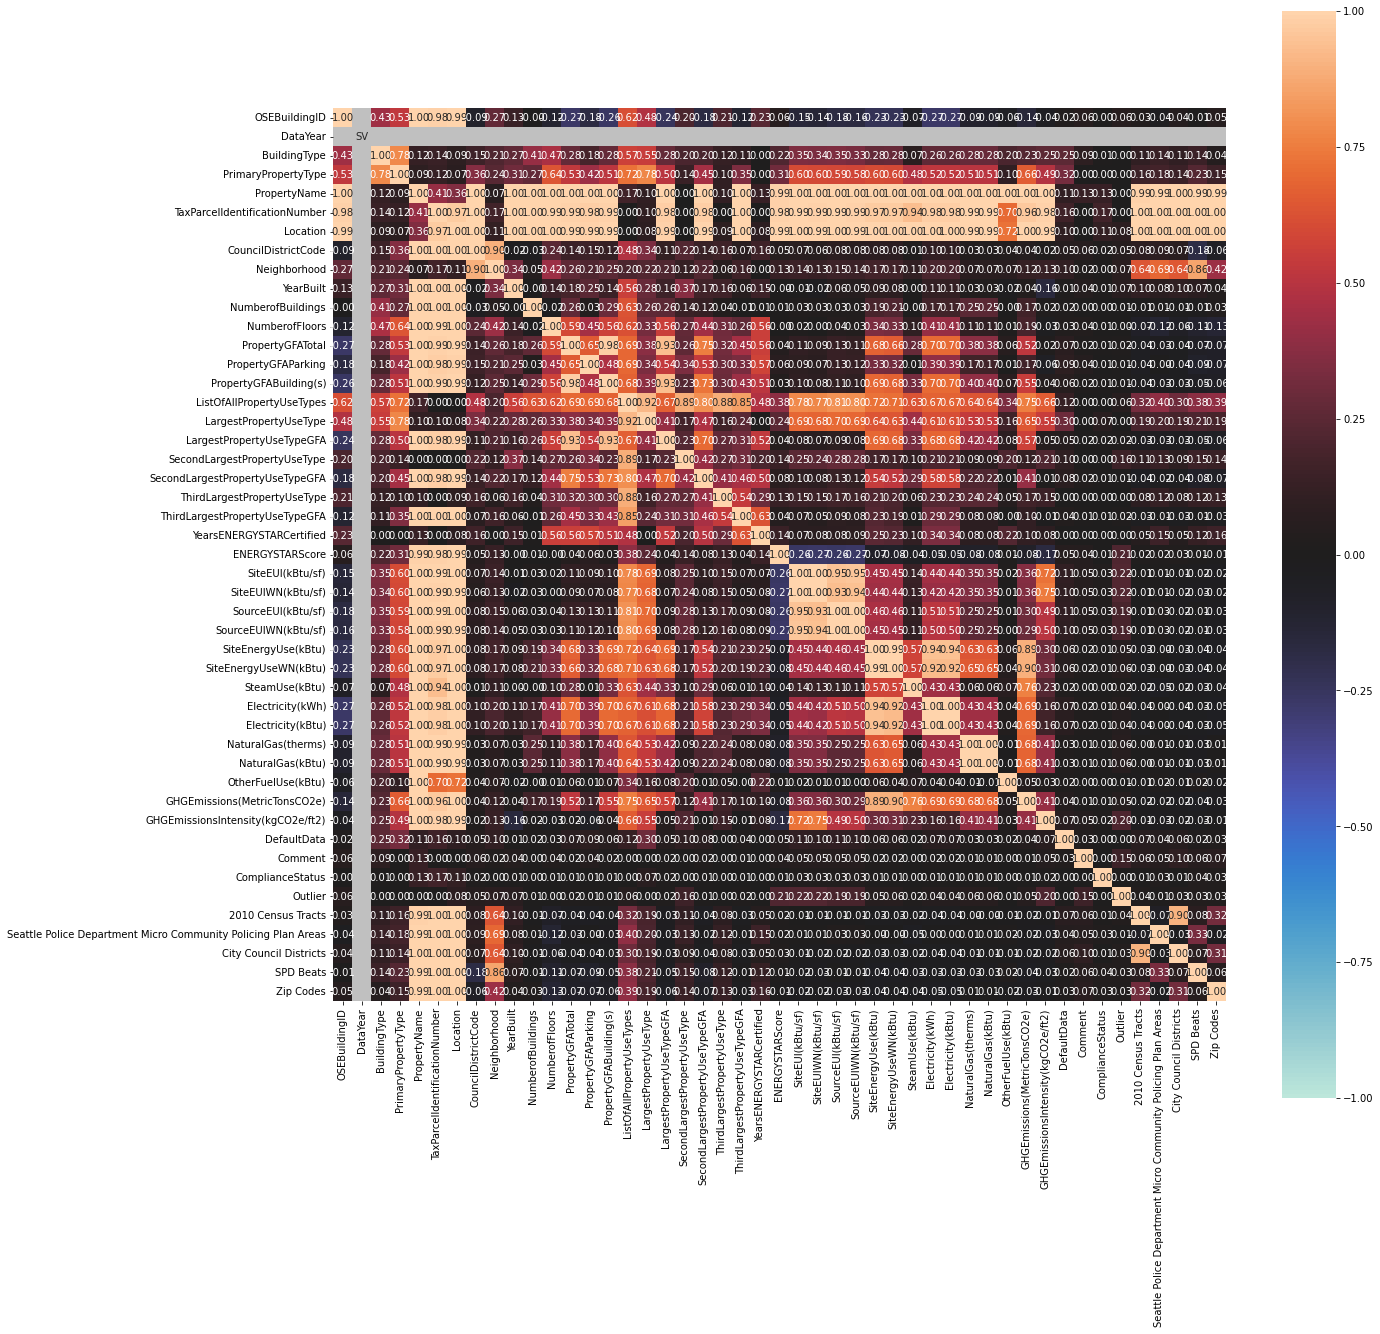

CPU times: total: 8.23 s
Wall time: 17.5 s


In [8]:
# Verificando a correlação visualmente:
from dython.nominal import associations
 
%time complete_correlation = associations(df_15, figsize=(20,20))